In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Inspect the measurement table to get the column names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [12]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [13]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2017-08-01', '2017-08-07'))

[(72.0, 79.25, 83.0)]


In [14]:
# Store historical start and end dates in variables
start_date = "2017-08-01"
end_date = "2017-08-07"

triptemps = calc_temps(start_date, end_date)
triptemps

[(72.0, 79.25, 83.0)]

In [15]:
# Store temp in a variables by slicing the data
tmin = triptemps[0][0]
tavg = triptemps[0][1]
tmax = triptemps[0][2]

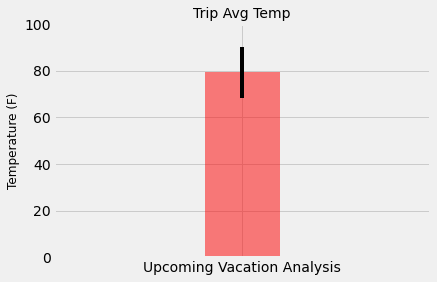

In [16]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = "Upcoming Vacation Analysis"
yerr = tmax -tmin

plt.bar(x, tavg, yerr=yerr, color="red", alpha=.5)
plt.title("Trip Avg Temp", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=12)
plt.ylim(0,100)
plt.xlim(-2,2)

plt.savefig("Images/vacation_ave_temps.png")
plt.show()

### Daily Rainfall Average

In [17]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
start_date = '2017-08-01'
end_date = '2017-08-07'

query_measure = session.query(Measurement.station, Measurement.prcp, Measurement.date).filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date).all()

query_station =session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date).all()

In [18]:
measure_df = pd.DataFrame(query_measure, columns = ['station', 'prcp','date'])
#measure_df

In [19]:
station_df = pd.DataFrame(query_station, columns = ['station', 'name','latitude', 'longitude', 'elevation'])
#station_df

In [20]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Merge dataframes on station
merge_df = pd.merge(measure_df, station_df, on="station")
merge_df = merge_df.sort_values("prcp", ascending=False)
merge_df

,station,prcp,date,name,latitude,longitude,elevation
646,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
660,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
644,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
671,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
670,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
...,...,...,...,...,...,...,...
751,USC00516128,NaN,2017-08-06,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
752,USC00516128,NaN,2017-08-06,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
753,USC00516128,NaN,2017-08-06,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
754,USC00516128,NaN,2017-08-06,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [21]:
merge_df = merge_df.dropna()
merge_df

,station,prcp,date,name,latitude,longitude,elevation
646,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
660,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
644,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
671,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
670,USC00516128,0.25,2017-08-02,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
...,...,...,...,...,...,...,...
380,USC00519523,0.00,2017-08-01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
379,USC00519523,0.00,2017-08-01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
378,USC00519523,0.00,2017-08-01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
377,USC00519523,0.00,2017-08-01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


In [22]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
# Changed to measurment functions in the provide code from "tobs" to "prcp" because the question is asking for precipitation, not temperature

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
# daily_normals("08-01")

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)
trip_dates

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06', '2017-08-07'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# Strip off the year and save a list of strings in the format %m-%d
trip_dates2 = trip_dates.strftime("%m-%d")
trip_dates2

Index(['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07'], dtype='object')

In [25]:
# Use the `daily_normals` function to calculate the normals for each date string and append the results to a list called `normals`.
# Flatten the list: https://stackoverflow.com/questions/20112776/how-do-i-flatten-a-list-of-lists-nested-lists

normals = []

for date in trip_dates2:
    normals.append(*daily_normals(date))
    
normals

[(0.0, 0.2519148936170213, 3.53),
 (0.0, 0.14759999999999998, 1.45),
 (0.0, 0.03627450980392157, 0.58),
 (0.0, 0.11916666666666666, 1.89),
 (0.0, 0.11000000000000003, 0.93),
 (0.0, 0.0852, 0.5),
 (0.0, 0.11499999999999996, 1.3)]

In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns = ['min', 'avg', 'max'])
#df.set_index('date', inplace=Tru
df

,min,avg,max
0,0.0,0.251915,3.53
1,0.0,0.147600,1.45
2,0.0,0.036275,0.58
3,0.0,0.119167,1.89
4,0.0,0.110000,0.93
5,0.0,0.085200,0.50
6,0.0,0.115000,1.30


In [27]:
# Add the dates to the dataframe and set as index
df["date"] = trip_dates2
df.set_index('date', inplace=True)
df

,min,avg,max
date,,,
08-01,0.0,0.251915,3.53
08-02,0.0,0.147600,1.45
08-03,0.0,0.036275,0.58
08-04,0.0,0.119167,1.89
08-05,0.0,0.110000,0.93
08-06,0.0,0.085200,0.50
08-07,0.0,0.115000,1.30


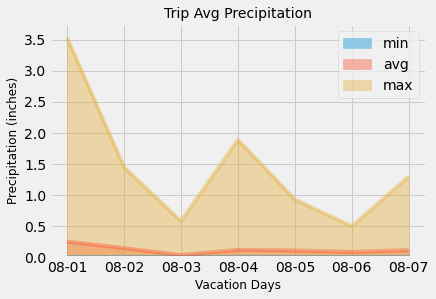

In [28]:
df.plot(kind="area", stacked=False, alpha=.4)

plt.title("Trip Avg Precipitation", fontsize=14)
plt.ylabel("Precipitation (inches)", fontsize=12)
plt.xlabel("Vacation Days", fontsize=12)
plt.ylim(0,3.75)

#plt.savefig("Images/vacation_ave_precip.png")
plt.show()


In [29]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals2(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
# daily_normals2("08-01")

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)
trip_dates

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06', '2017-08-07'],
              dtype='datetime64[ns]', freq='D')

In [31]:
# Strip off the year and save a list of strings in the format %m-%d
trip_dates2 = trip_dates.strftime("%m-%d")
trip_dates2

Index(['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07'], dtype='object')

In [32]:
# Use the `daily_normals` function to calculate the normals for each date string and append the results to a list called `normals`.
# Flatten the list: https://stackoverflow.com/questions/20112776/how-do-i-flatten-a-list-of-lists-nested-lists

normals2 = []

for date in trip_dates2:
    normals2.append(*daily_normals2(date))
    
normals2

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals2, columns = ['min', 'avg', 'max'])
#df.set_index('date', inplace=Tru
df

,min,avg,max
0,67.0,75.540000,83.0
1,68.0,75.603774,84.0
2,70.0,76.611111,85.0
3,69.0,76.711538,84.0
4,69.0,76.148148,82.0
5,67.0,76.250000,83.0
6,71.0,77.156863,83.0


In [34]:
# Add the dates to the dataframe and set as index
df["date"] = trip_dates2
df.set_index('date', inplace=True)
df

,min,avg,max
date,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


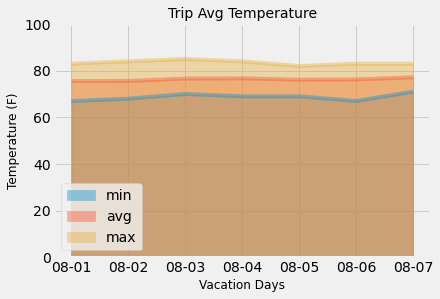

In [35]:
df.plot(kind="area", stacked=False, alpha=.4)

plt.title("Trip Avg Temperature", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=12)
plt.xlabel("Vacation Days", fontsize=12)
plt.ylim(0,100)

#plt.savefig("Images/vacation_ave_temp.png")
plt.show()


## Close Session

In [36]:
# Close Session
session.close()